Books(core)

Laura Dimaria

7/25/22

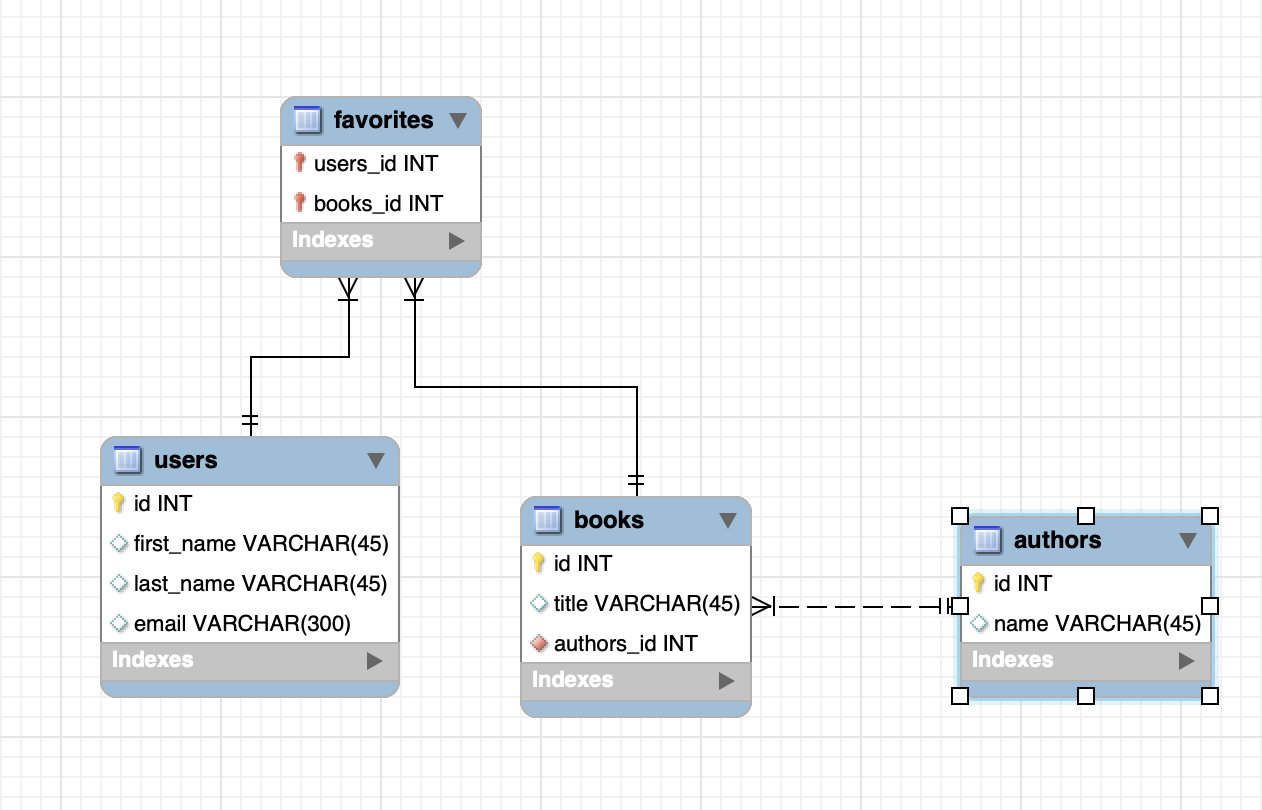

In [31]:
import pandas as pd
import pymysql
pymysql.install_as_MySQLdb()
from sqlalchemy import create_engine
from sqlalchemy_utils import create_database, database_exists
connection = "mysql+pymysql://root:INSERT PASSWORD@localhost/books"
engine = create_engine(connection)
engine
create_database(connection)
database_exists(connection)

ProgrammingError: (pymysql.err.ProgrammingError) (1007, "Can't create database 'books'; database exists")
[SQL: CREATE DATABASE books CHARACTER SET = 'utf8']
(Background on this error at: https://sqlalche.me/e/14/f405)

In [ ]:
file1 = 'https://docs.google.com/spreadsheets/d/1_c2WTx_eiH8pUM-PTgyt7T4aIl1A3Cp1ukPVPEijoYc/gviz/tq?tqx=out:csv&sheet=users'
users = pd.read_csv(file1)
users.head()

In [ ]:
file2 = 'https://docs.google.com/spreadsheets/d/1_D-vW7GXiQfG6D9nzjscgVctKLb6TZl_o8ERNH_tet8/gviz/tq?tqx=out:csv&sheet=books'
books = pd.read_csv(file2)
books.head()

In [ ]:
file3 = 'https://docs.google.com/spreadsheets/d/17rABPt5eaIxfhGO75dYCbH-5IloKsAR0HH9V6VC43ZI/gviz/tq?tqx=out:csv&sheet=authors'
authors = pd.read_csv(file3)
authors.head()

In [ ]:
file4 = 'https://docs.google.com/spreadsheets/d/1SLb3RAhcrZsPWRwR0_njWX7KssUYZ16JFsVqBkSU2GI/gviz/tq?tqx=out:csv&sheet=favorite'
favorites = pd.read_csv(file4)
favorites.head()

In [ ]:
users.to_sql('users', engine, if_exists = 'replace')
books.to_sql('books', engine, if_exists = 'replace')
authors.to_sql('authors', engine, if_exists = 'replace')
favorites.to_sql('favorites', engine, if_exists = 'replace')

In [ ]:
q = '''SELECT books.title, favorites.user_id
FROM books
JOIN favorites ON books.id = favorites.book_id
WHERE favorites.user_id = 
    (SELECT users.id FROM users WHERE (users.last_name = "Doe" AND users.first_name = "John"));'''

pd.read_sql(q, engine)